# Pensamiento probabilistico - Variables discretas
## Logica probabilistica y estadistica inferencial
### Adrián Vázquez 
#### 17/05/21

<b> Estadistica inferencial </b>
 - Se usa para sacar conclusiones probabilisticas sobre lo que podriamos esperar si volvieramos a recoher los mismos datos 
 - Sacar conclusiones procesables a partir de los datos. 
 - Sacar conclusiones mas generales a partir de relativamente pocos datos u observaciones. 

<b> Numeros aleatorios : </b>  np.random module

- np.random.random() : Devuelve un numero aleatorio entre el cero y uno

- El generador de numeros aleatorios funciona comenzando con un numero entero, una semilla. 
  y luego genera numeros aleatorios en suceción. La misma semilla de la misma secuencia de numeros aleatorios. 

<b> Ejemplo </b>
- Generaremos muchos números aleatorios entre el cero y el uno, y luego trazaremos un histograma de los resultados. Si los números son realmente aleatorios, todas las barras del histograma deberían tener (casi) la misma altura.

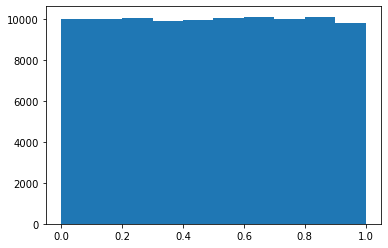

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Ejemplo 
# declarando la semilla para el generador de numeros aleatorios

np.random.seed(42)

#iniciar los numeroos aleatorios 
random_numeros = np.empty(100000)#<-- crea un array del tamaño 

# genera numeros aleatorios usando un ciclo for alrededor de un rango de  100000
for i in range(100000):
    random_numeros[i] = np.random.random()
    
   
_ = plt.hist(random_numeros)

plt.show()


## <b> Pruebas de bernoulli </b>

- En un ensayo Bernoulli como el lanzamiento de una moneda posiblemente sesgada. En concreto, cada lanzamiento de la moneda tiene una probabilidad de salir cara (éxito) y una probabilidad de salir cruz (fracaso). En este ejercicio, escribirás una función para realizar n ensayos Bernoulli, perform_bernoulli_trials(n, p), que devuelve el número de aciertos de n ensayos Bernoulli, cada uno de los cuales tiene una probabilidad p de éxito. Para realizar cada ensayo Bernoulli, se utiliza la función np.random.random(), que devuelve un número aleatorio entre cero y uno.

In [10]:
def bernulli(n,p):
    
    n_exitos= 0
    for i in range(n):
        numero_random = np.random.random()
        
        if numero_random < p:
            n_exitos += 1
        
    return n_exitos

- Supongamos que un banco concede 100 préstamos hipotecarios. Es posible que entre 0 y 100 de los préstamos sean impagados. Te gustaría saber la probabilidad de obtener un número determinado de impagos, dado que la probabilidad de un impago es p = 0,05. Para investigar esto, harás una simulación. Realizarás 100 ensayos Bernoulli utilizando la función bernoulli() que escribiste en el ejercicio anterior y registrarás cuántos incumplimientos obtenemos. Aquí, un éxito es un defecto. (Recuerde que la palabra "éxito" sólo significa que el ensayo Bernoulli se evalúa como Verdadero, es decir, ¿el destinatario del préstamo incumplió?) Se hará esto para otros 100 ensayos de Bernoulli. Y una y otra vez hasta que lo hayamos probado 1000 veces. A continuación, trazarás un histograma que describa la probabilidad del número de impagos.


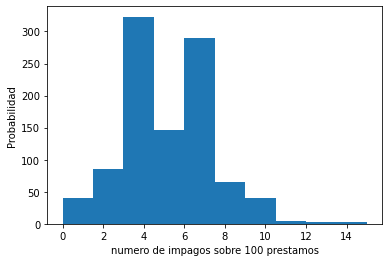

In [14]:
#Insertar la semilla
np.random.seed(42)

defaults = np.empty(1000)

for i in range(1000):
    defaults[i] = bernulli(100, .05)
    
_ = plt.hist(defaults)
_ = plt.xlabel('numero de impagos sobre 100 prestamos')
_ = plt.ylabel('Probabilidad')
plt.show()
    

<b> Graficar el numero de defectos que se tiene en el ejercicio anterior </b>
- Si los tipos de interes son taleas que el banco perdera dinero si 10 o mas de sus prestamos son impagados. ¿Cual es la probabilidad de que el banco pierda dinero?
- utilizar función ECDF

In [16]:
# Función para calcular un ECDF: devuelve x y y del ECDF
import numpy as np 
def ecdf(datos): 
    n = len(datos) #<------ Numero de puntos de datos
    x = np.sort(datos) #<----- ordena los datos 
    y = np.arange(1, len(x) + 1)/n #<------ datos especificamos uniformemente con maximo de uno 
    return x, y  #<--------- Regresar valores para x y y



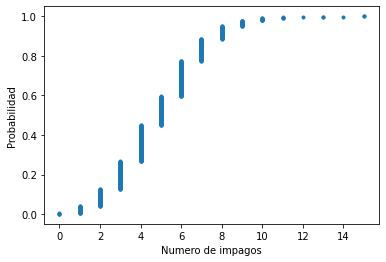

probabilidad de perder dinero cada 10 impagos =  0.022


In [23]:
#calculando el ECDF
x,y = ecdf(defaults)

plt.plot (x, y, marker = '.' , linestyle = 'none')
_ = plt.xlabel('Numero de impagos')
_ = plt.ylabel('Probabilidad')
plt.show()

#Calculando el número de simulaciones de 100 préstamos con 10 o mas impagos
n_perdidas =  np.sum(defaults >= 10)

#calculando la probabilidad de perder dinero 
print('probabilidad de perder dinero cada 10 impagos = ', n_perdidas / len(defaults))

- Como vemos lo mas probable es que se produzcan 5/100 impagos. Pero todavia tenemos un 2% de posibilidades de obtener 10 o mas impagos de cada 100 prestamos  

## <b> Distribuciones de probabilidad y calculos: Distribución binomial </b>

- Función de masa de probabilidad (PMF)
- PMF : Se define como el conjunto de probabilidades de resultados discretos 
  - Es una propiedad de una distribución de probabilidad discreta

<b>Muestreo de la distribución binomial</b>
- Calcule la función de masa de probabilidad para el número de impagos que esperaríamos para 100 préstamos como en la última sección, pero en lugar de simular todos los ensayos Bernoulli, realice el muestreo utilizando np.random.binomial(). Esto es idéntico al cálculo que hizo en el último conjunto de ejercicios utilizando su función bernoulli() escrita a medida, pero mucho más eficiente computacionalmente. Dada esta eficiencia adicional, tomaremos 10.000 muestras en lugar de 1000. Después de tomar las muestras, trace la CDF como la última vez. Esta CDF que estás trazando es la de la distribución Binomial.

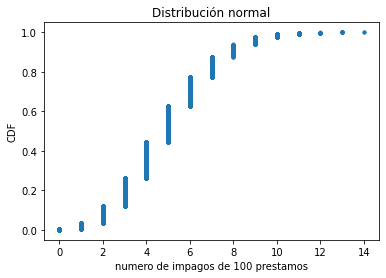

In [25]:
#Insertar la semilla
np.random.seed(42)

#calculando distribución normal
n_defaults = np.random.binomial(100, 0.05, size = 10000)

#calculando x, y en ECDF
x, y = ecdf(n_defaults)
plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('numero de impagos de 100 prestamos')
_ = plt.ylabel('CDF')
_ = plt.title('Distribución normal')
plt.show()

## Trazando el PMF Binomial
- vamos a trazar el PMF de la distribución Binomial como un histograma. El truco consiste en configurar los bordes de los intervalos para pasarlos a plt.hist() mediante el argumento de la palabra clave bins. Queremos que los bins estén centrados en los enteros. Por lo tanto, los bordes de los bins deben ser -0.5, 0.5, 1.5, 2.5, ... hasta max(n_defaults) + 1.5. Puedes generar un array como este usando np.arange() y luego restando 0.5 del array.

- ya ha tomado muestras de la distribución Binomial durante sus ejercicios sobre los incumplimientos de los préstamos, y las muestras resultantes están en la matriz NumPy <b>defaults. </b>

AttributeError: 'Rectangle' object has no property 'normed'

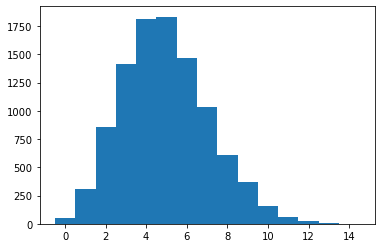

In [28]:
#calculando los bordes de los bins
bins = np.arange(0,max(n_defaults) + 1.5) -0.5

_ = plt.hist(n_defaults, normed = True, bins = bins)

_ = plt.xlabel('numero de impagos de 100 prestamos')
_ = plt.ylabel('CDF')
_ = plt.title('Distribución normal')
plt.show()

## Distribución Possion 

### BINOMIAL VS POISSON

- La distribución de Poisson es un límite de la distribución Binomial para los sucesos raros. 
- Es importante destacar que la distribución de Poisson suele ser más sencilla de trabajar porque sólo tiene un parámetro en lugar de los dos de la distribución Binomial.

In [41]:
# Extraer 10000 muestras de la distribución Poisson con lambda 10
muestras = np.random.poisson(10, size = 10000)

#imprimir la media y la desviación 
print('poisson\n', 'media: \n  ', np.mean(muestras), '\n', 'desv. est: \n ', np.std(muestras))

# lista de valores n y p a considerar para la distribución Binommial.
n = [20,100,1000]
p = [.5,.1,.01]
# np siempre es 10 

# Usando np.random.binomial() dentro del bucle for proporcionado, extrae 10000 muestras 
# de una distribución Binomial con cada par n, p e imprime la media y la desviación estándar 
# de las muestras. Hay 3 pares n, p: 20, 0.5, 100, 0.1, y 1000, 0.01. 
# Se puede acceder a ellos dentro del bucle como n[i], p[i].

# Extraer 10, 000 muestras para cada n, p par 
for i in range(3): 
    muestra_binomial = np.random.binomial(1000, 0.01, size = 10000)
    print( 'n = ' ,n[i], 'Binom: ' ,np.mean(muestra_binomial), np.std(muestra_binomial))

poisson
 media: 
   9.9347 
 desv. est: 
  3.1277205613673353
n =  20 Binom:  9.9884 3.147072519024625
n =  100 Binom:  9.9726 3.154591770736746
n =  1000 Binom:  9.9934 3.1046024608635485


<b>CONCLUSION</b>
- Las medias son casi iguales, lo que puede demostrarse con un poco de trabajo de lápiz y papel. La desviación estándar de la distribución Binomial se acerca cada vez más a la de la distribución Poisson a medida que la probabilidad p es cada vez menor.

### Ultimo ejercicio: 

- ¡Fue 2015 un año anómalo?
  - En 1990 y 2015 se produjo el mayor número de no-hitters de cualquier temporada de béisbol (hubo siete). Dado que hay una media de 251/115 no-hitters por temporada, ¿cuál es la probabilidad de tener siete o más en una temporada?

In [46]:
# añadimos nuestra semilla
np.random.seed(42)
# Empezamos extrayendo 10000 muestras de una distribución poisson con una media de 251/115 
n_nohitters = np.random.poisson(251/115, size = 10000)
print(n_nohitters)

[4 1 3 ... 1 2 4]


In [48]:
# calcular el numero de muestras que son mayor o igual a 7 
n_large = np.sum(n_nohitters >= 7)
print(n_large)

67


In [50]:
#calculamos la probabilidad de obtener 7 o mas 
prob = n_large/10000
#imprimimos
print('La probabilidad de obtener 7 o mas no-hitters es: ', prob)

La probabilidad de obtener 7 o mas no-hitters es:  0.0067


<b> CONCLUSIÓN :</b>
- El resultado es aproximadamente 0,007. Esto significa que no es tan improbable ver una temporada de 7 o más no-hits en un siglo. Hemos visto dos en siglo y medio, así que no es descabellado.